# Importing Libraries

In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix,classification_report,accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
import joblib

In [311]:
#Loading Data
data=pd.read_csv("covertype.csv")
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


# Exploratory Data Analysis

In [313]:
data.shape

(581012, 55)

In [314]:
#Checking The Information Of Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Unnamed: 0                          581012 non-null  int64
 1   Unnamed: 1                          581012 non-null  int64
 2   Unnamed: 2                          581012 non-null  int64
 3   Elevation                           581012 non-null  int64
 4   Aspect                              581012 non-null  int64
 5   Slope                               581012 non-null  int64
 6   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 7   Vertical_Distance_To_Hydrology      581012 non-null  int64
 8   Horizontal_Distance_To_Roadways     581012 non-null  int64
 9   Hillshade_9am                       581012 non-null  int64
 10  Hillshade_Noon                      581012 non-null  int64
 11  Hillshade_3pm                       581012 non-null 

In [315]:
#Checking Null Count
data.isnull().sum()

Unnamed: 0                            0
Unnamed: 1                            0
Unnamed: 2                            0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area                       0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [316]:
#Checking Duplicates
data.duplicated().sum()

0

In [317]:
#Renaming Columns
data=data.rename(columns={"Unnamed: 0":"Feature: 0","Unnamed: 1":"Feature: 1","Unnamed: 2":"Feature: 2"})

In [318]:
#Checking The Statistics
data.describe()

,Feature: 0,Feature: 1,Feature: 2,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


# Data Visualization

In [320]:
#Correlation
correlation=data.corr(numeric_only=True)
correlation

,Feature: 0,Feature: 1,Feature: 2,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Feature: 0,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,...,0.167077,0.070633,0.011731,0.083005,0.021107,0.035433,0.217179,0.193595,0.212612,-0.269554
Feature: 1,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,...,0.056233,0.019163,0.010861,-0.021991,0.002281,-0.020398,0.017706,0.008294,-0.005866,0.017080
Feature: 2,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,...,-0.133504,0.208942,-0.011002,-0.022228,0.002918,0.007848,-0.072208,0.093602,0.025637,0.148285
Elevation,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,...,0.127217,0.101195,0.070268,-0.005231,0.033421,-0.006802,0.043031,0.031922,0.147020,-0.020317
Aspect,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,...,0.039762,0.167091,0.060274,-0.006092,0.012955,-0.007520,-0.008629,0.043859,0.179006,0.081664
Slope,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580,...,-0.089019,-0.082779,0.006390,-0.003000,0.007550,0.016313,0.079778,0.033762,0.016052,-0.153450
Horizontal_Distance_To_Hydrology,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669,...,0.006494,-0.064381,0.007154,0.027870,0.007865,0.010332,0.015108,-0.029620,-0.000016,-0.035415
Vertical_Distance_To_Hydrology,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329,...,0.125395,-0.086164,0.043061,0.005863,0.016239,-0.022707,0.042952,-0.071961,-0.040176,-0.096426
Horizontal_Distance_To_Roadways,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981,...,0.083066,-0.024393,0.017757,-0.016482,0.001330,-0.022064,0.022187,-0.029040,-0.024254,-0.048290
Hillshade_9am,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000,...,-0.089977,-0.059067,-0.035067,-0.000081,-0.010595,0.004180,-0.019740,-0.003301,0.008915,-0.108936


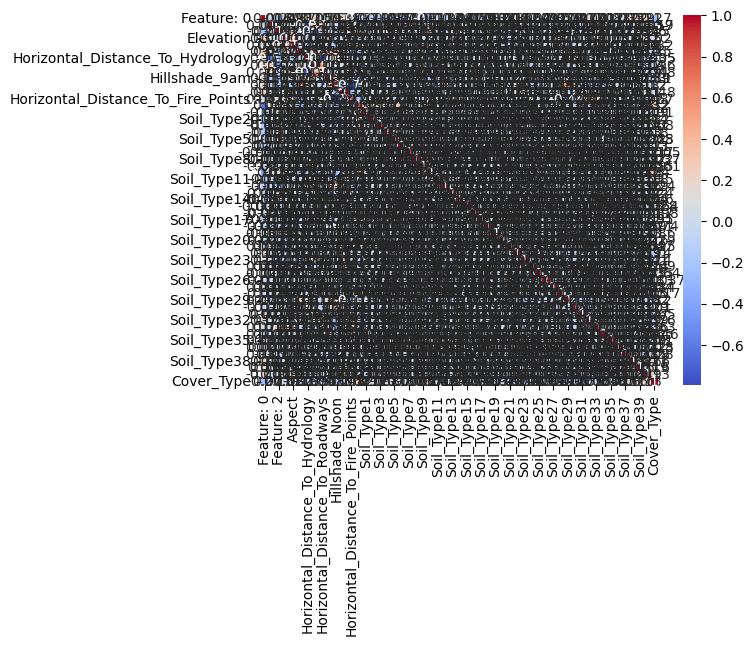

In [321]:
#Heatmap For Correlation Of Features
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap="coolwarm")
plt.show()

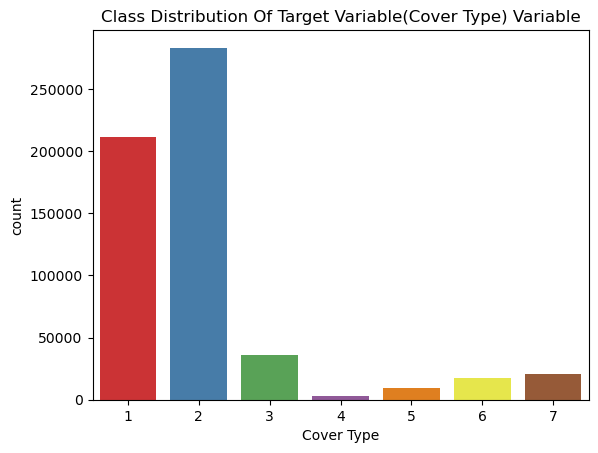

In [322]:
#Checking Class Distribution
y=data.Cover_Type
sns.countplot(data=data,x=y,palette="Set1")
plt.title("Class Distribution Of Target Variable(Cover Type) Variable")
plt.xlabel("Cover Type")
plt.show()

# Selecting Features

In [324]:
X=data.drop(["Cover_Type"],axis=1)
y=data["Cover_Type"]

In [325]:
#Splting Features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [326]:
# Train and fit Random Forest model
rf_model=RandomForestClassifier(n_estimators=100,class_weight="balanced",random_state=42,n_jobs=-1)
rf_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

# Prediction On Training Data

In [328]:
y_train_pred=rf_model.predict(X_train)

In [329]:
#Evaluation Metrics Of Training Data
prec_rf=precision_score(y_train,y_train_pred,average="weighted")
rec_rf=recall_score(y_train,y_train_pred,average="weighted")
f1_rf=f1_score(y_train,y_train_pred,average="weighted")
acc_rf=accuracy_score(y_train,y_train_pred)
print("Accuracy:",acc_rf)
print("Precision:",prec_rf)
print("Recall:",rec_rf)
print("F1-Score:",f1_rf)

Accuracy: 0.9999975412335139
Precision: 0.9999975412500953
Recall: 0.9999975412335139
F1-Score: 0.9999975412345583


In [330]:
#Classifiation Report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00    148284
           2       1.00      1.00      1.00    198223
           3       1.00      1.00      1.00     25116
           4       1.00      1.00      1.00      1952
           5       1.00      1.00      1.00      6552
           6       1.00      1.00      1.00     12140
           7       1.00      1.00      1.00     14441

    accuracy                           1.00    406708
   macro avg       1.00      1.00      1.00    406708
weighted avg       1.00      1.00      1.00    406708



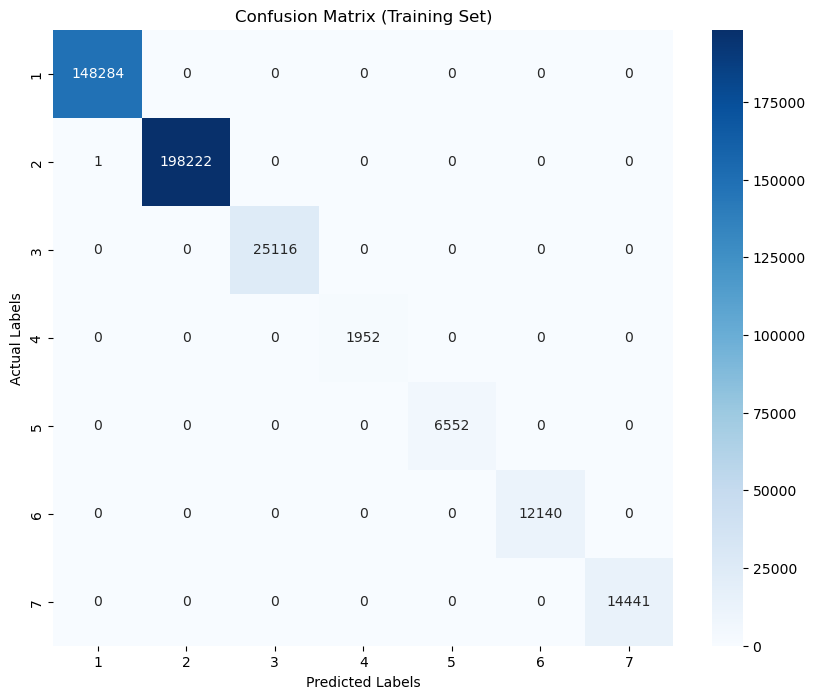

In [331]:
#Confusion Metrix Of Training Data
plt.figure(figsize=(10,8))
cm=confusion_matrix(y_train,y_train_pred)
sns.heatmap(cm,annot=True,cmap="Blues",xticklabels=rf_model.classes_,yticklabels=rf_model.classes_,fmt="d")
plt.title("Confusion Matrix (Training Set)")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

# Prediction On Testing Data

In [333]:
y_test_pred=rf_model.predict(X_test)

In [334]:
#Evaluation Metrics Of Testing Data
prec_rf_test=precision_score(y_test,y_test_pred,average="weighted")
recall_rf_test=recall_score(y_test,y_test_pred,average="weighted")
f1_rf_test=f1_score(y_test,y_test_pred,average="weighted")
acc_rf_test=accuracy_score(y_test,y_test_pred)
print("Accuracy:",acc_rf_test)
print("Precision:",prec_rf_test)
print("Recall:",recall_rf_test)
print("F1-Score:",f1_rf_test)

Accuracy: 0.953185239581421
Precision: 0.9533107852713628
Recall: 0.953185239581421
F1-Score: 0.9529508238530041


In [335]:
#Classification Report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           1       0.96      0.94      0.95     63556
           2       0.95      0.97      0.96     85078
           3       0.94      0.96      0.95     10638
           4       0.91      0.85      0.88       795
           5       0.94      0.78      0.85      2941
           6       0.93      0.89      0.91      5227
           7       0.97      0.95      0.96      6069

    accuracy                           0.95    174304
   macro avg       0.94      0.91      0.92    174304
weighted avg       0.95      0.95      0.95    174304



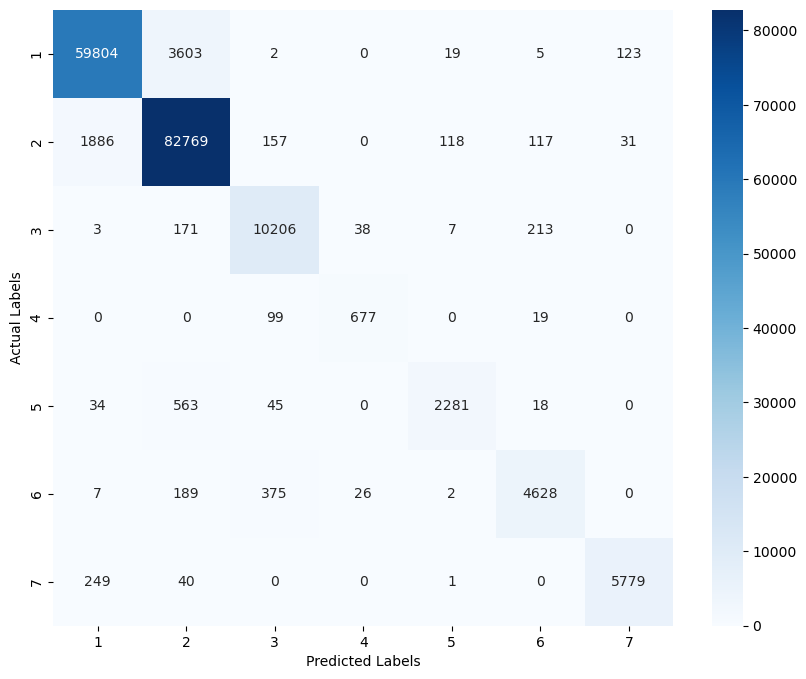

In [336]:
#Confuion Matrix Of Testing Data
cm=confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,xticklabels=rf_model.classes_,yticklabels=rf_model.classes_,fmt="d",cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [337]:
#Checking Prediction Results
results=pd.DataFrame({
    "Actual Cover Type":y_test,
    "Predicted Cover Type":y_test_pred
})
results

,Actual Cover Type,Predicted Cover Type
250728,1,1
246788,2,2
407714,2,2
25713,2,2
21820,2,2
...,...,...
137449,2,2
542402,1,1
512435,2,2
89637,2,2


In [338]:
#Saving The Model
joblib.dump(rf_model,"RandomForestModel.pkl")

['RandomForestModel.pkl']

# Implementing XGBOOST

In [340]:
#Selecting Features
X=data.drop("Cover_Type",axis=1)
y=data["Cover_Type"]

In [341]:
#Spliting the Features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [342]:
y_train_xgb = y_train - 1
y_test_xgb = y_test - 1

In [343]:
# Train And Fit XGBOOST model
xg_model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)
xg_model.fit(X_train, y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=-1, num_parallel_tree=None, ...)

In [344]:
# Predictions for train and test
y_train_pred = xg_model.predict(X_train) + 1   
y_test_pred  = xg_model.predict(X_test) + 1 

# Prediction On Training Data

In [346]:
#Evaluation Metrics Of Training Data
pre_xg_model=precision_score(y_train, y_train_pred, average="weighted")
recall_xg_model=recall_score(y_train, y_train_pred, average="weighted")
f1_xg_model=f1_score(y_train, y_train_pred, average="weighted")
acc_xg_model=accuracy_score(y_train, y_train_pred)
print("Accuracy:",acc_xg_model)
print("Precision:",pre_xg_model)
print("Recall:",recall_xg_model)
print("F1-Score:",f1_xg_model)

Accuracy: 0.7900754730552458
Precision: 0.7902820383395637
Recall: 0.7900754730552458
F1-Score: 0.7851827498401599



Classification Report (Train):
               precision    recall  f1-score   support

           1       0.78      0.76      0.77    141862
           2       0.80      0.85      0.82    189778
           3       0.76      0.86      0.81     24058
           4       0.87      0.84      0.85      1872
           5       0.86      0.24      0.37      6268
           6       0.70      0.39      0.50     11605
           7       0.89      0.74      0.81     13835

    accuracy                           0.79    389278
   macro avg       0.81      0.67      0.71    389278
weighted avg       0.79      0.79      0.79    389278



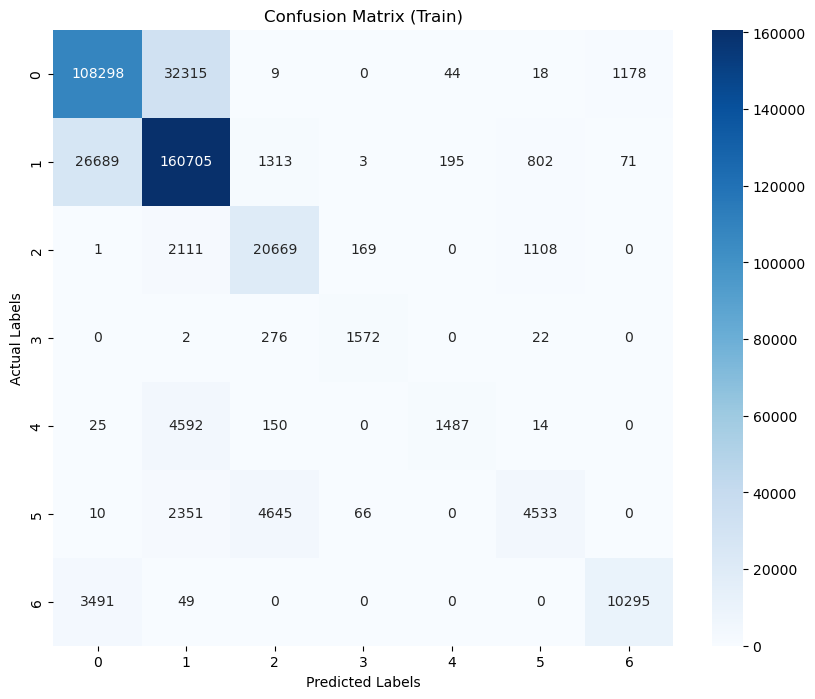

In [347]:
# Classification report
print("\nClassification Report (Train):\n", 
      classification_report(y_train, y_train_pred))

# Confusion matrix Of Training Data
cm = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=xg_model.classes_,
            yticklabels=xg_model.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix (Train)")
plt.show()

In [348]:
#Evaluation Metrics Of Testing Data
pre_xg_model_test=precision_score(y_test, y_test_pred, average="weighted")
recall_xg_model_test=recall_score(y_test, y_test_pred, average="weighted")
f1_xg_model_test=f1_score(y_test, y_test_pred, average="weighted")
acc_xg_model_test=accuracy_score(y_test, y_test_pred)
print("Accuracy:",acc_xg_model_test)
print("Precision:",pre_xg_model_test)
print("Recall:",recall_xg_model_test)
print("F1-Score:",f1_xg_model_test)

Accuracy: 0.7844200819885884
Precision: 0.7842992696171692
Recall: 0.7844200819885884
F1-Score: 0.7793072955495405


# Prediction On Testing Data


Classification Report (Test):
               precision    recall  f1-score   support

           1       0.78      0.76      0.77     69978
           2       0.79      0.84      0.82     93523
           3       0.76      0.85      0.80     11696
           4       0.84      0.78      0.81       875
           5       0.84      0.23      0.35      3225
           6       0.69      0.38      0.49      5762
           7       0.88      0.73      0.80      6675

    accuracy                           0.78    191734
   macro avg       0.80      0.65      0.69    191734
weighted avg       0.78      0.78      0.78    191734



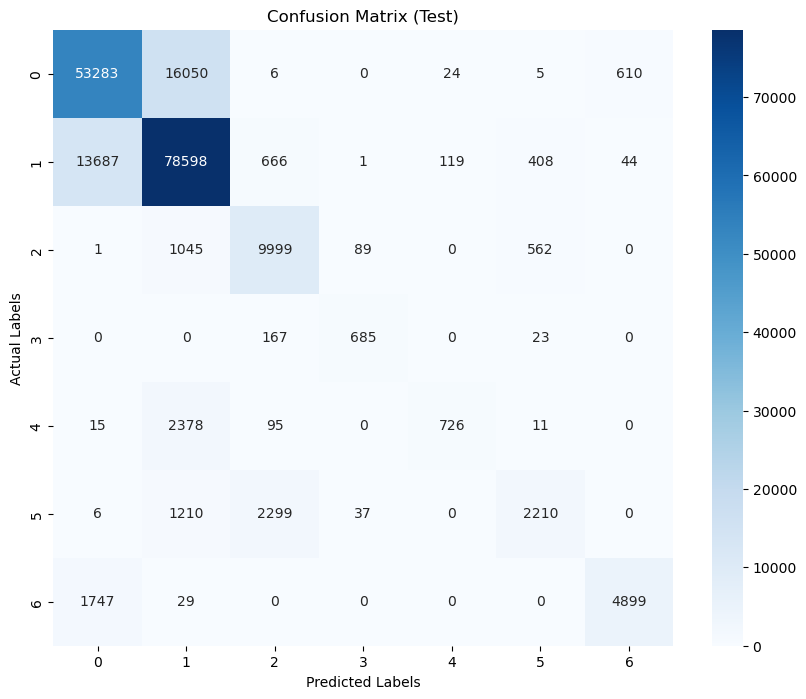

In [350]:
# Classification report
print("\nClassification Report (Test):\n", 
      classification_report(y_test, y_test_pred))

# Confusion matrix Of Testing Data
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=xg_model.classes_,
            yticklabels=xg_model.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix (Test)")
plt.show()

In [351]:
#Checking The results Of Prediction
results=pd.DataFrame({
    "Actual Cover Type":y_test,
    "Predicted Cover Type":y_test_pred
})
results

,Actual Cover Type,Predicted Cover Type
250728,1,1
246788,2,2
407714,2,2
25713,2,2
21820,2,2
...,...,...
230946,6,2
410389,2,2
234510,3,3
307274,1,1


In [352]:
# Encode y_train and y_test to start from 0
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

print("Classes:", le.classes_)


Classes: [1 2 3 4 5 6 7]


# HyperParameter Tuning

In [354]:
# Parameter grid
param_grid_xgb = {
    'n_estimators': [50,100],
    'max_depth': [4, 6],
    'learning_rate': [0.05, 0.1, 0.3, 0.5, 1]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=XGBClassifier(
        random_state=42,
        n_jobs=-1,
        num_class=len(le.classes_)
    ),
    param_grid=param_grid_xgb,   
    cv=3,
    scoring='accuracy',
    verbose=2
)

# Fit
grid_search.fit(X_train, y_train)

# Best results
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END ...learning_rate=0.05, max_depth=4, n_estimators=50; total time=   9.6s
[CV] END ...learning_rate=0.05, max_depth=4, n_estimators=50; total time=  10.6s
[CV] END ...learning_rate=0.05, max_depth=4, n_estimators=50; total time=  10.3s
[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=100; total time=  20.8s
[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=100; total time=  21.0s
[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=100; total time=  18.7s
[CV] END ...learning_rate=0.05, max_depth=6, n_estimators=50; total time=  11.1s
[CV] END ...learning_rate=0.05, max_depth=6, n_estimators=50; total time=  11.4s
[CV] END ...learning_rate=0.05, max_depth=6, n_estimators=50; total time=  11.4s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=100; total time=  25.1s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=100; total time=  21.4s
[CV] END ..learning_rate=0.05, max_depth=6, n_es

In [355]:
#Saving The Model In best_model Class
best_model=grid_search.best_estimator_

# Prediction On Training Data


Classification Report (Train):
               precision    recall  f1-score   support

           1       0.95      0.93      0.94    141862
           2       0.95      0.96      0.96    189778
           3       0.99      0.99      0.99     24058
           4       1.00      1.00      1.00      1872
           5       0.98      0.96      0.97      6268
           6       0.98      0.98      0.98     11605
           7       1.00      1.00      1.00     13835

    accuracy                           0.96    389278
   macro avg       0.98      0.97      0.98    389278
weighted avg       0.96      0.96      0.96    389278



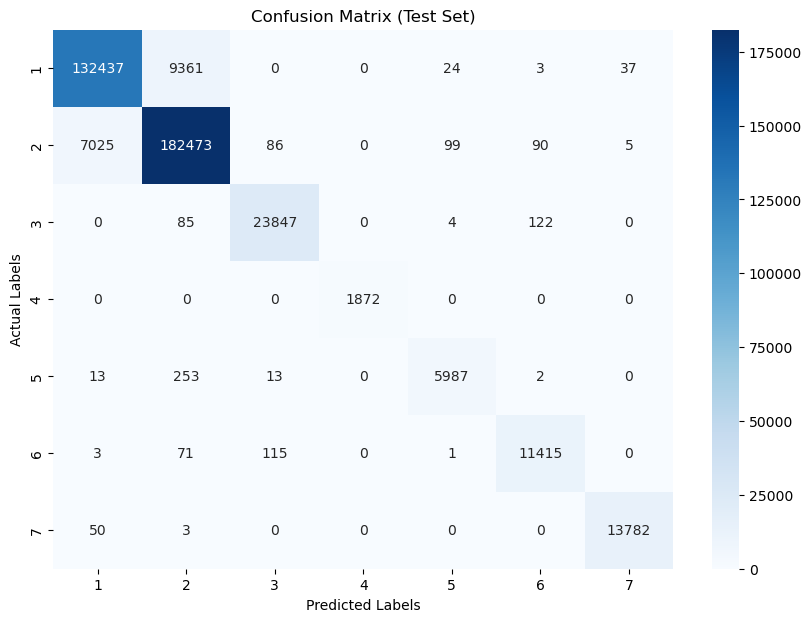

In [357]:
# Predictions On Training Data
y_train_pred = best_model.predict(X_train)

#Classification Report Of Training Data
print("\nClassification Report (Train):\n", 
      classification_report(y_train, y_train_pred, target_names=le.classes_.astype(str)))

# Confusion Matrix On Training Data
cm = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=le.classes_, 
            yticklabels=le.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix (Test Set)")
plt.show()


# Prediction On Testing Data


Classification Report (Test):
               precision    recall  f1-score   support

           1       0.93      0.91      0.92     69978
           2       0.93      0.94      0.93     93523
           3       0.95      0.95      0.95     11696
           4       0.90      0.86      0.88       875
           5       0.90      0.81      0.85      3225
           6       0.91      0.91      0.91      5762
           7       0.96      0.96      0.96      6675

    accuracy                           0.93    191734
   macro avg       0.93      0.91      0.92    191734
weighted avg       0.93      0.93      0.93    191734



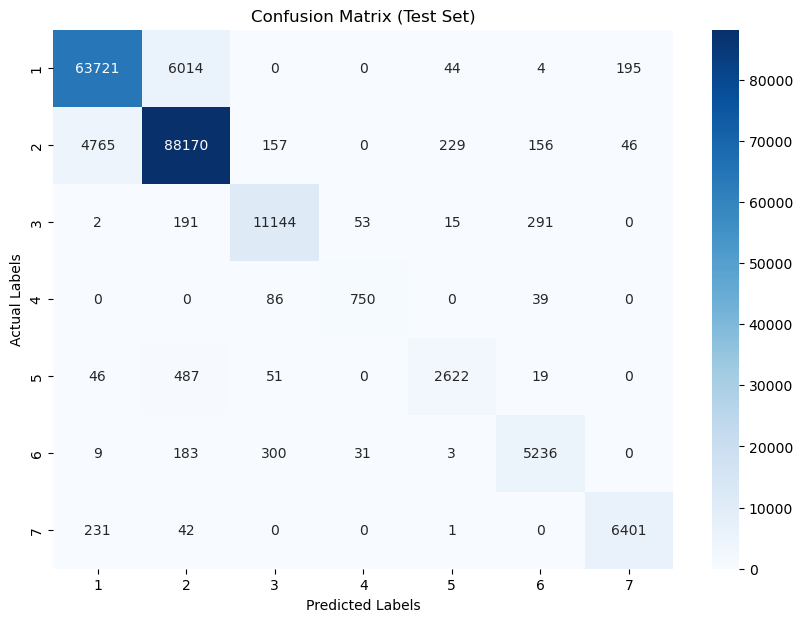

In [359]:
# Predictions
y_test_pred = best_model.predict(X_test)

# Report
print("\nClassification Report (Test):\n", 
      classification_report(y_test, y_test_pred, target_names=le.classes_.astype(str)))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=le.classes_, 
            yticklabels=le.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix (Test Set)")
plt.show()


In [360]:
#Saving The Model
joblib.dump(best_model,"XGBOOSTModel.pkl")

['XGBOOSTModel.pkl']

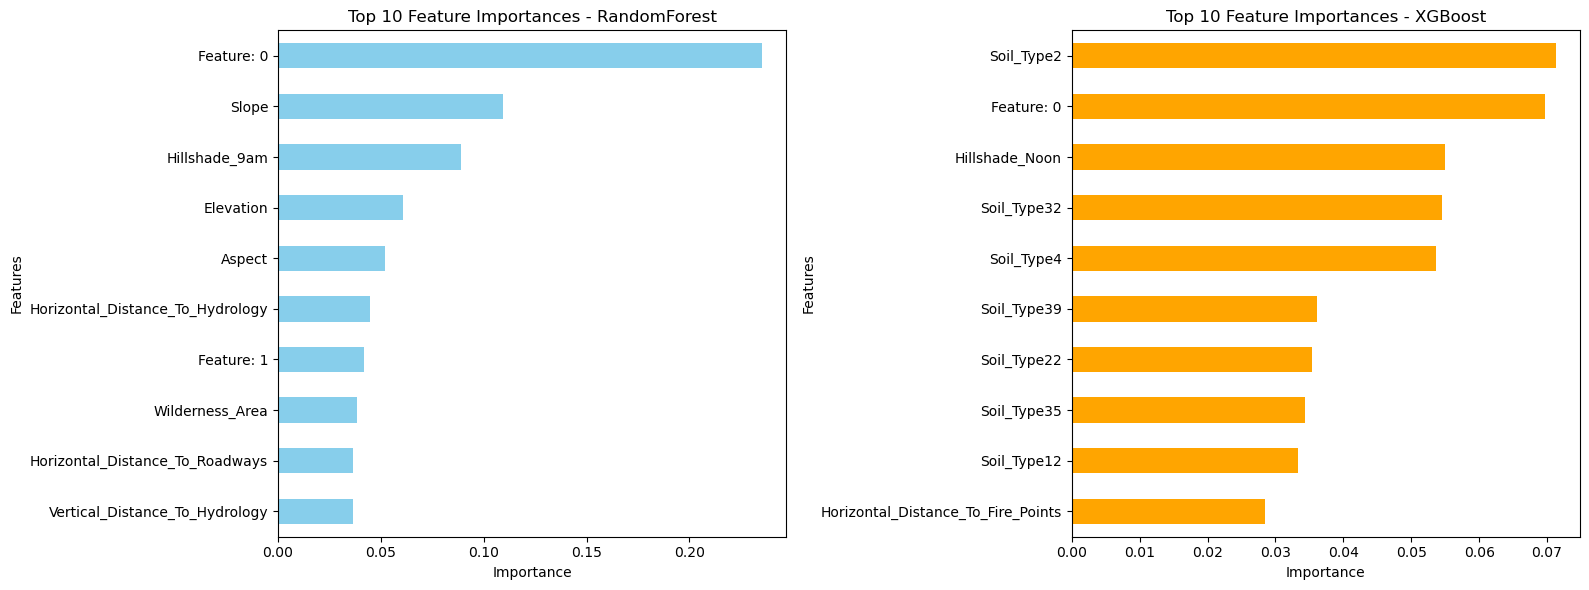

In [361]:
# Loading Models
rf_model = joblib.load("RandomForestModel.pkl")
xgb_model = joblib.load("XGBoostModel.pkl")

# Getting Feature Importances 
rf_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
xgb_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16,6))

# RandomForest Top 10 - Horizontal Bar 
rf_importances.head(10).sort_values(ascending=True).plot(kind="barh", color="skyblue", ax=axes[0])
axes[0].set_title("Top 10 Feature Importances - RandomForest")
axes[0].set_xlabel("Importance")
axes[0].set_ylabel("Features")

# XGBoost Top 10 - Horizontal Bar 
xgb_importances.head(10).sort_values(ascending=True).plot(kind="barh", color="orange", ax=axes[1])
axes[1].set_title("Top 10 Feature Importances - XGBoost")
axes[1].set_xlabel("Importance")
axes[1].set_ylabel("Features")

plt.tight_layout()
plt.show()

# Combined Comparison 
comparison = pd.DataFrame({
    "RandomForest": rf_importances,
    "XGBoost": xgb_importances
})

plt.show()


<Figure size 1200x600 with 0 Axes>

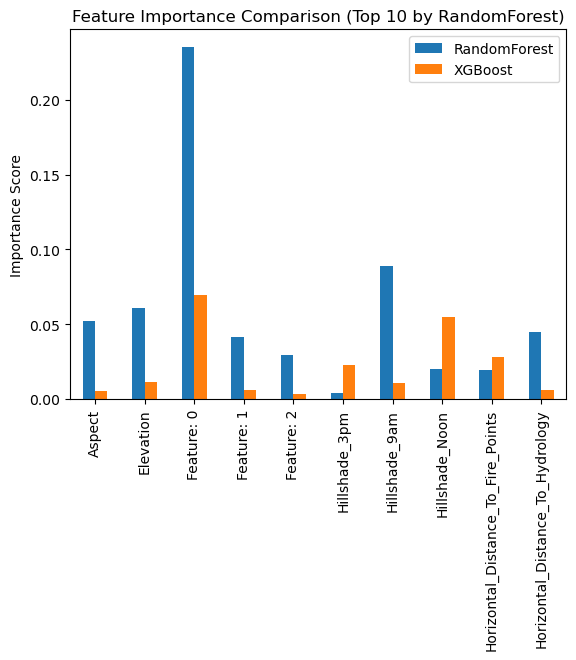

In [362]:
#Feature Importance Comparasion
plt.figure(figsize=(12,6))
comparison.head(10).plot(kind="bar")
plt.title("Feature Importance Comparison (Top 10 by RandomForest)")
plt.ylabel("Importance Score")
plt.show()

In [363]:
#Comparasion Of (Random Forest V/S XGBOOST) Metrics 
metrics_comparasion=pd.DataFrame({
    "Metrics":["Accuracy","Precision","Recall","F1-Score"],
    "Random Forest":[acc_rf_test,prec_rf_test,recall_rf_test,f1_rf_test],
    "XGBOOST":[acc_xg_model_test,pre_xg_model_test,recall_xg_model_test,f1_xg_model_test]
})
metrics_comparasion

,Metrics,Random Forest,XGBOOST
0,Accuracy,0.953185,0.784420
1,Precision,0.953311,0.784299
2,Recall,0.953185,0.784420
3,F1-Score,0.952951,0.779307


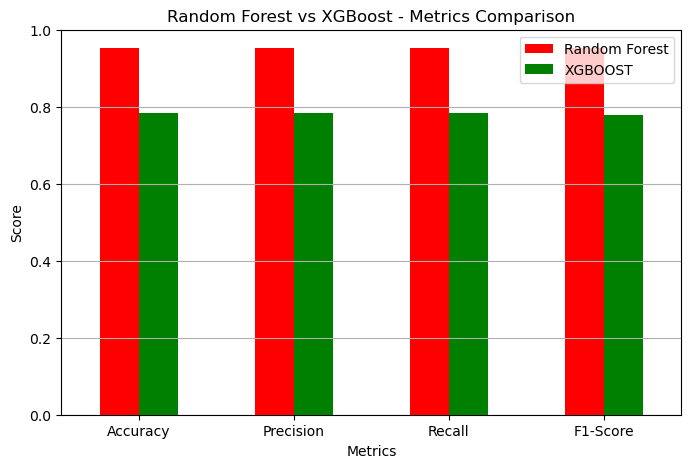

In [364]:
#Bar Plot Of Comparasion Metrics
metrics_comparasion.set_index("Metrics").plot(
    kind='bar', figsize=(8, 5), color=["red", "green"]
)
plt.title("Random Forest vs XGBoost - Metrics Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


## Based on the evaluation metrics, the Random Forest model achieved higher accuracy compared to the XGBoost model. Therefore, for this dataset, Random Forest is the preferred choice over XGBoost.
